# K-Nearest Neighbors (K-NN) Classifier - No Brainer

In this notebook, we create a K-NN classifier model using Scikit-Learn for performing binary classification. 

- The goal is to show how to use Scikit-Learn to create a K-NN classifier model. 

We use the default values for the hyperparameters and don't perform any model selection.

Obviously using a Machine Learning (ML) model with its default settings is not very useful. We need to understand the nuts and bolts of a ML model, the ML algorithm(s), model selection, model evaluation, and techniques for improving a model's performance. We will address these issues in the next notebooks of this repository. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## Dataset

We will use the Iris dataset, which is a multivariate data set. It is a famous dataset that contains the sepal and petal length and width of 150 Iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

There are 4 features: 
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Total number of samples: 150

The target (label) is coded as follows:
- Setosa: 0
- Versicolor: 1
- Virginica: 2

<img src="http://engineering.unl.edu/images/uploads/IrisFlowers.png" width=800, height=400>


## Load the Dataset

In [2]:
# Load the dataset
iris = datasets.load_iris()

# See the key values
print("\nKey Values: \n", list(iris.keys()))

# The feature names
print("\nFeature Names: \n", list(iris.feature_names))

# The target names
print("\nTarget Names: \n", list(iris.target_names))



Key Values: 
 ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

Feature Names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target Names: 
 ['setosa', 'versicolor', 'virginica']


## Create the Data Matrix (X) and the Target Array (y)

Our goal is to detect the Iris-Virginica type. In the above Target array, the index for Virginica is 2.

Thus, we create a binary target vector by putting 1 if the target value is 2 (Iris-Virginica), else we put 0.

In [3]:
# Data Matrix
X = iris["data"]

# Target Vector
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

print(X.shape)
print(y.shape)

print("\nX data type: ", X.dtype)
print("y data type: ", y.dtype)

(150, 4)
(150,)

X data type:  float64
y data type:  int64


## Visualize the Distribution of Classes using a Bar Chart

In [4]:
# Count number of samples in each class
y_virginica = 0
y_not_virginica = 0

for i in range(len(y)):
    if(y[i] == 1):
        y_virginica += 1
    else:
        y_not_virginica +=1
        
        
print("Total Virginica: ", y_virginica)
print("Total Not-Virginica: ", y_not_virginica)

Total Virginica:  50
Total Not-Virginica:  100


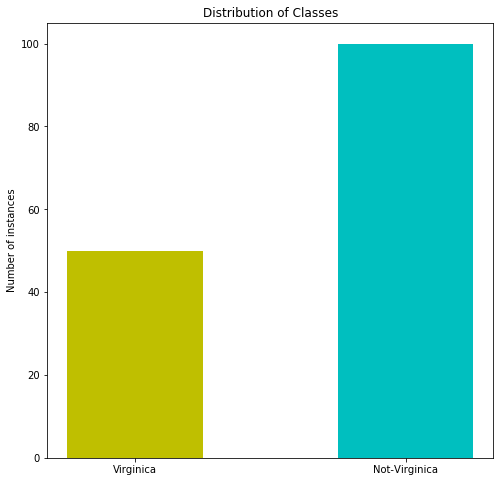

In [11]:
plt.figure(figsize = (8, 8))

classes = ['Virginica', 'Not-Virginica']
data = [y_virginica, y_not_virginica]

#plt.bar(range(len(classes)), data, width=0.5, color='y')

'''
Plt a single bar per class individually
'''
plt.bar(0, y_virginica, width=0.5,color='y')
plt.bar(1, y_not_virginica, width=0.5, color='c')


plt.title("Distribution of Classes")
plt.ylabel("Number of instances")

# label x-axis with class names at bar centers
plt.xticks(range(len(classes)), classes)
plt.show()

## Create Training & Test Subsets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Create a KNN Classifier Model

In [16]:
%%time

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

CPU times: user 1.11 ms, sys: 760 µs, total: 1.87 ms
Wall time: 1.22 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Evaluation: Training Data

In [17]:
%%time

y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)


Training Accuracy:  0.95
CPU times: user 5.6 ms, sys: 1.88 ms, total: 7.48 ms
Wall time: 5.58 ms


## Evaluation: Test Data

In [18]:
%%time

# The accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))


Test Accuracy:  0.9666666666666667

No. of correct predictions (Test): 29/30
CPU times: user 8.86 ms, sys: 3.63 ms, total: 12.5 ms
Wall time: 9.53 ms


## Other Performce Measures

In [12]:
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

precision = precision_score(y_test, y_test_predicted) 
print("\nTest: Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Test: Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("Test: F1 Score = %f" % f1)


Confusion Matrix (Test Data):
 [[23  1]
 [ 0  6]]

Test: Precision = 0.857143
Test: Recall = 1.000000
Test: F1 Score = 0.923077
